# 데이터 불러오기

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# math
import math

In [2]:
# 경고 메세지 무시하기

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("./lakers.csv", encoding="cp949")
df.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


In [4]:
df_copy=df.copy()
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


# 데이터 살펴보기

<칼럼 설명>

* data : 경기 일자
* opponent : 대전 팀
* game_type : 홈 경기 vs 원정 경기
* time : 분:초
* period : 쿼터 (한 쿼터 당 12분 씩, 동점인 경우 5 쿼터 진행)
* etype : 유형
* team : 팀 구분 (LAL : LA Lakers, 상대 팀)
* player : 선수명
* result : 결과
* points : 점수
* type : 세부 행동
* x, y : 상대편 팀 골대 뒤에서 바라본 x, y 좌표, 골대의 위치는 (25, 5, 25) 이다.

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       34624 non-null  int64  
 1   opponent   34624 non-null  object 
 2   game_type  34624 non-null  object 
 3   time       34624 non-null  object 
 4   period     34624 non-null  int64  
 5   etype      34624 non-null  object 
 6   team       34624 non-null  object 
 7   player     29231 non-null  object 
 8   result     16888 non-null  object 
 9   points     34624 non-null  int64  
 10  type       24242 non-null  object 
 11  x          13067 non-null  float64
 12  y          13067 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.4+ MB


In [6]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
dtype: int64

<범주형 변수 vs 연속형 변수>

* 범주형 변수 (빈도 계산 가능)

```opponent, game_type, etype, team, player, type, period, result```

* 연속형 변수 (수치 계산 가능)

```시간 변수 (date, time), points, x, y```

* 무조건 숫자라고 해서 연속형 변수는 아니다. 
* (예시) period, 평균 또는 표준 편차 구할 이유가 없다.

In [7]:
df_copy.describe()

,date,period,points,x,y
count,3.462400e+04,34624.000000,34624.000000,13067.000000,13067.000000
mean,2.008694e+07,2.535524,0.462714,25.317670,13.430550
std,4.372405e+03,1.124725,0.849231,11.185946,8.665827
min,2.008103e+07,1.000000,0.000000,0.000000,3.000000
25%,2.008121e+07,2.000000,0.000000,20.000000,6.000000
50%,2.009012e+07,3.000000,0.000000,25.000000,10.000000
75%,2.009031e+07,4.000000,1.000000,31.000000,20.000000
max,2.009041e+07,5.000000,3.000000,51.000000,90.000000


In [8]:
df_copy.describe(include=object)

,opponent,game_type,time,etype,team,player,result,type
count,34624,34624,34624,34624,34624,29231,16888,24242
unique,29,2,717,10,31,370,2,73
top,DEN,home,0:00,shot,LAL,Kobe Bryant,made,def
freq,1855,17471,357,13108,17235,2945,8916,4768


In [9]:
print(f'Opponent : {df_copy["opponent"].unique()}')
print(f'Game Type : {df_copy["game_type"].unique()}')
print(f'Etype : {df_copy["etype"].unique()}')
print(f'Team : {df_copy["team"].unique()}')
print(f'Result : {df_copy["result"].unique()}')
print(f'Type : {df_copy["type"].unique()}')

Opponent : ['POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN' 'TOR' 'IND'
 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS' 'UTA' 'GSW'
 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Game Type : ['home' 'away']
Etype : ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']
Team : ['OFF' 'LAL' 'POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN'
 'TOR' 'IND' 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS'
 'UTA' 'GSW' 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Result : [nan 'missed' 'made']
Type : [nan 'hook' 'off' 'layup' 'shooting' 'personal' 'jump' 'pullup jump' 'def'
 'driving layup' 'driving finger roll layup' 'regular' 'offensive' '3pt'
 'turnaround jump' 'putback layup' 'slam dunk' 'tip' 'dunk'
 'defensive goaltending' 'hook bank' 'running layup' 'official'
 'driving slam dunk' 'short' 'driving reverse layup' 'kicked ball'
 'putback dunk' 'technical' 'alley oop dunk' 'turnaround fade away'
 'running jump' 'delay of game'

In [10]:
print(f'Player : {df_copy["player"].unique()}')

Player : [nan 'Pau Gasol' 'Vladimir Radmanovic' 'Derek Fisher' 'Greg Oden'
 'LaMarcus Aldridge' 'Kobe Bryant' 'Travis Outlaw' 'Andrew Bynum'
 'Brandon Roy' 'Steve Blake' 'Joel Przybilla' 'Lamar Odom'
 'Rudy Fernandez' 'Trevor Ariza' 'Jordan Farmar' 'Channing Frye'
 'Sergio Rodriguez' 'Sasha Vujacic' 'Jerryd Bayless' 'Nicolas Batum'
 'Luke Walton' 'Ike Diogu' 'Josh Powell' 'Chris Mihm' 'Chris Kaman'
 'Baron Davis' 'Tim Thomas' 'Cuttino Mobley' 'Al Thornton' 'Brian Skinner'
 'Jason Hart' 'Steve Novak' 'Eric Gordon' 'Ricky Davis' 'Mike Taylor'
 'Paul Davis' 'Kenyon Martin' 'Carmelo Anthony' 'Allen Iverson'
 'Nene Hilario' 'Anthony Carter' 'J.R. Smith' 'Chris Andersen'
 'Linas Kleiza' 'Juwan Howard' 'Marcus Camby' 'Luis Scola' 'Ron Artest'
 'Rafer Alston' 'Yao Ming' 'Tracy McGrady' 'Chuck Hayes' 'Aaron Brooks'
 'Carl Landry' 'Brent Barry' 'Luther Head' 'Jason Terry' 'Erick Dampier'
 'Gerald Green' 'Jason Kidd' 'Dirk Nowitzki' 'Jerry Stackhouse'
 'Brandon Bass' 'Jose Juan Barea' 'DeSagana D

In [11]:
print(f'전체 데이터의 개수 : {df_copy.shape[0]*df_copy.shape[1]}')
print(f'전체 결측치의 개수 : {df_copy.isnull().sum().sum()}')
print(f'전체 데이터에서 결측치 비율 : {((df_copy.isnull().sum().sum())/(df_copy.shape[0]*df_copy.shape[1]))*100:.2f}%')

전체 데이터의 개수 : 450112
전체 결측치의 개수 : 76625
전체 데이터에서 결측치 비율 : 17.02%


In [12]:
print(f'LA 팀 상대편 수 : {df_copy["opponent"].nunique()}')
print(f'경기 등장 행동 수 : {df_copy["etype"].nunique()}')
print(f'경기 등장 세부 행동 수 : {df_copy["type"].nunique()}')

LA 팀 상대편 수 : 29
경기 등장 행동 수 : 10
경기 등장 세부 행동 수 : 73


# 데이터에서 질문 만들기

* LAL 원정 경기와 홈 경기 비율?
* 경기에서 선수들이 가장 많이 하는 행동 유형은?
* 이번 시즌에서 LAL 경기 결과는?
* LAL 선수들은 코트의 어떤 위치에서 어떤 동작을 하였는가?

# 데이터 정비하기

## 시간 타입의 칼럼 정비하기

In [13]:
# date와 time을 하나의 칼럼으로 합쳐주기.
df_copy["date"]=df_copy["date"].astype(str)

In [14]:
df_copy["datetime"]=df_copy["date"]+" "+df_copy["time"]
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,20081028 12:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,20081028 11:23


In [15]:
# 날짜 타입에 맞게 변경하기. (시계열 분석 시 매우 유용)
df_copy["datetime"]=pd.to_datetime(df_copy["datetime"], format='%Y%m%d %H:%M:%S')
df_copy["date"]=pd.to_datetime(df_copy["date"], format='%Y%m%d')

In [16]:
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


## 결측치 처리하기

In [17]:
# 칼럼 별 결측치의 유무 확인
df_copy.isnull().any(axis=0)

date         False
opponent     False
game_type    False
time         False
period       False
etype        False
team         False
player        True
result        True
points       False
type          True
x             True
y             True
datetime     False
dtype: bool

In [18]:
df_copy.isnull().sum()
# player, result, type은 특정한 값이기 때문에 결측치 안 채워도 좋다.
# x, y 또한 좌표이기 때문에 결측치 채우지 않아도 되지만, 0을 넣어 보도록 하자.
# 좌표계이기 때문에 0을 넣는다고 해서 크게 문제되지 않는다.

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [19]:
# 하지만, 0을 넣기 전에 0이 있는지 확인해야 한다.
# 왜냐하면 실제 데이터가 0인 경우에는 결측치를 모두 0으로 변경 시 잘못된 결과를 가져올 수 있기 때문이다.
print(df_copy.index[df_copy["x"]==0].tolist())
print(df_copy.index[df_copy["x"]==-1].tolist())
print(df_copy.index[df_copy["y"]==0].tolist())

[203, 3636, 4205, 4272, 4474, 9407, 13882, 13890, 14484, 14992, 16488, 16955, 22606, 23761, 30173, 33921, 34053, 34517]
[]
[]


In [20]:
# 값이 존재하기 때문에 x=-1, y=0 넣어주기.
df_copy["x"]=df_copy["x"].fillna(-1)
df_copy["y"]=df_copy["y"].fillna(0)

# EDA & Visualization

## LAL 홈 경기와 원정 경기 비율

In [21]:
# 각 날짜 별 경기 그룹화하기.
df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum()

,
date,game_type
2008-10-28,home
2008-10-29,away
2008-11-01,away
2008-11-05,home
2008-11-09,home
...,...
2009-04-07,away
2009-04-09,home
2009-04-10,away


In [22]:
# as_index=False
df_copy[["date", "game_type"]].groupby(["date", "game_type"], as_index=False).sum()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [23]:
# reset_index
df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum().reset_index()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [24]:
# 지금은 홈 경기와 원정 경기의 비율만 알아볼 것이다. 그러니, 첫 번째 빼고 모두 날리는 방식 이용하기.
# drop_duplicate, keep="first"
df1=df_copy.drop_duplicates("date", keep="first")
df1.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,-1.0,0.0,2008-10-28 12:00:00
416,2008-10-29,LAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,-1.0,0.0,2008-10-29 12:00:00
871,2008-11-01,DEN,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,-1.0,0.0,2008-11-01 12:00:00
1364,2008-11-05,LAC,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,-1.0,0.0,2008-11-05 12:00:00
1867,2008-11-09,HOU,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,-1.0,0.0,2008-11-09 12:00:00


In [70]:
# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# seaborn 배경색 설정
sns.set_style("darkgrid")

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

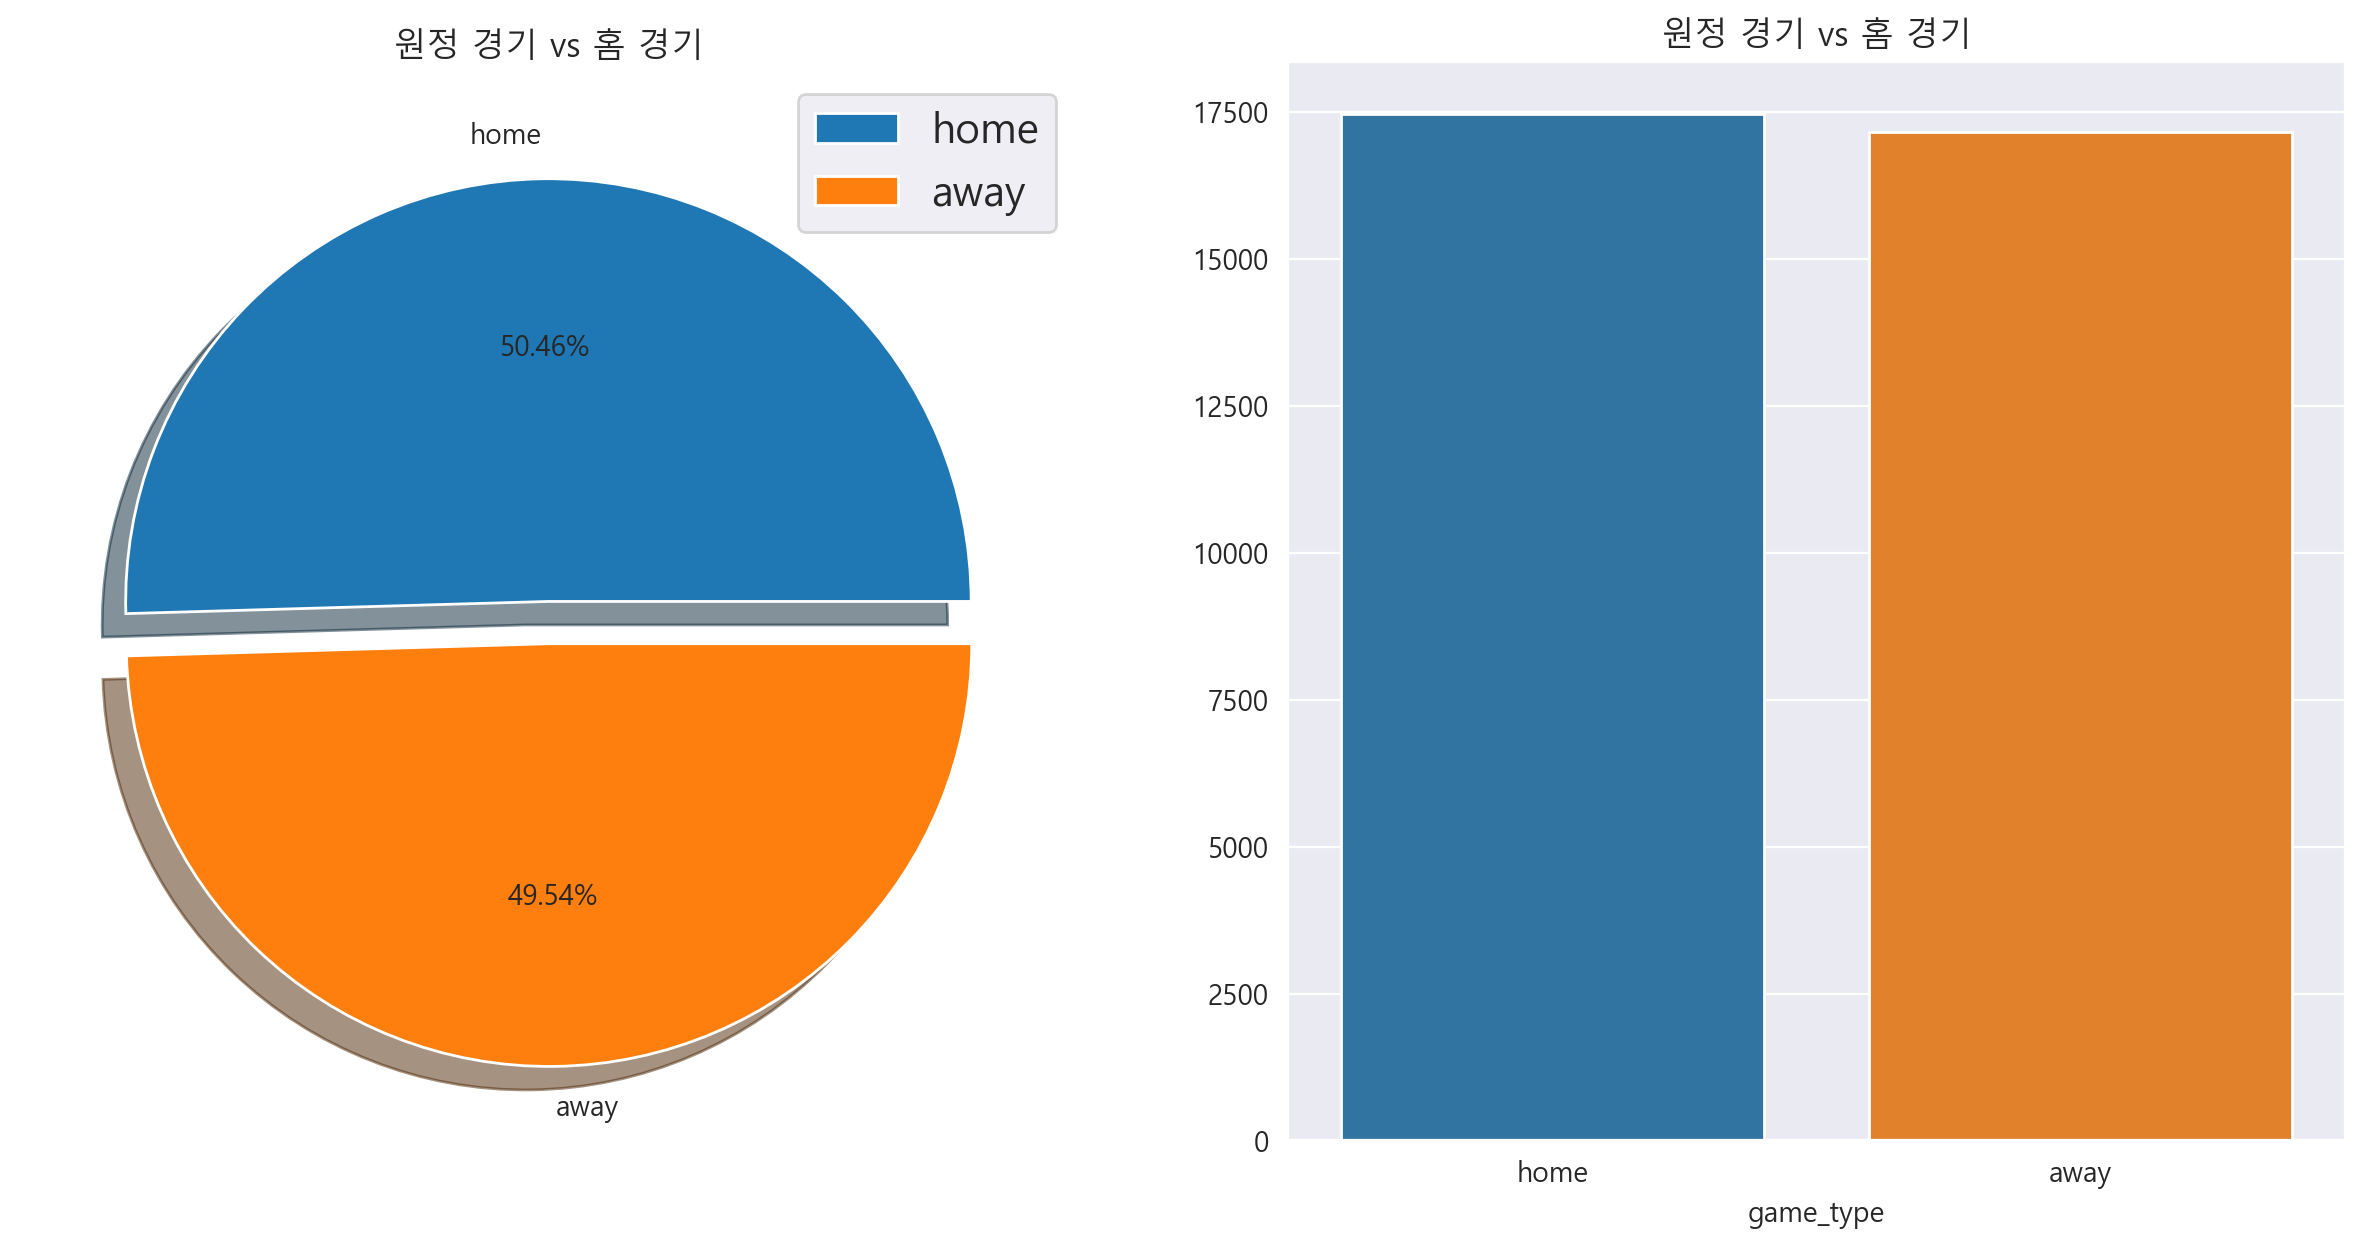

In [26]:
fig, ax=plt.subplots(1, 2, figsize=(15, 7), dpi=200)
ax=ax.flatten()

# pie plot
_=df_copy["game_type"].value_counts().plot.pie(ax=ax[0], explode=[0, 0.1], 
                                               autopct="%.2f%%", shadow=True)
_=ax[0].set_ylabel("")
_=ax[0].set_title("원정 경기 vs 홈 경기")
_=ax[0].legend(fontsize=15)

# count plot
_=sns.countplot(data=df_copy, x="game_type", ax=ax[1])
_=ax[1].set_title("원정 경기 vs 홈 경기")
_=ax[1].set_ylabel("")

## 경기에서 발생한 행동 유형 확인하기

In [27]:
# 행동 수
print(f'경기 등장 행동 수 : {df_copy["etype"].nunique()}')

경기 등장 행동 수 : 10


In [28]:
# 각각의 행동 유형이 얼마나 발생?
df_copy["etype"].value_counts()

shot          13108
rebound        7971
free throw     3780
foul           3417
sub            2891
turnover       2261
timeout         950
jump ball       131
violation       114
ejection          1
Name: etype, dtype: int64

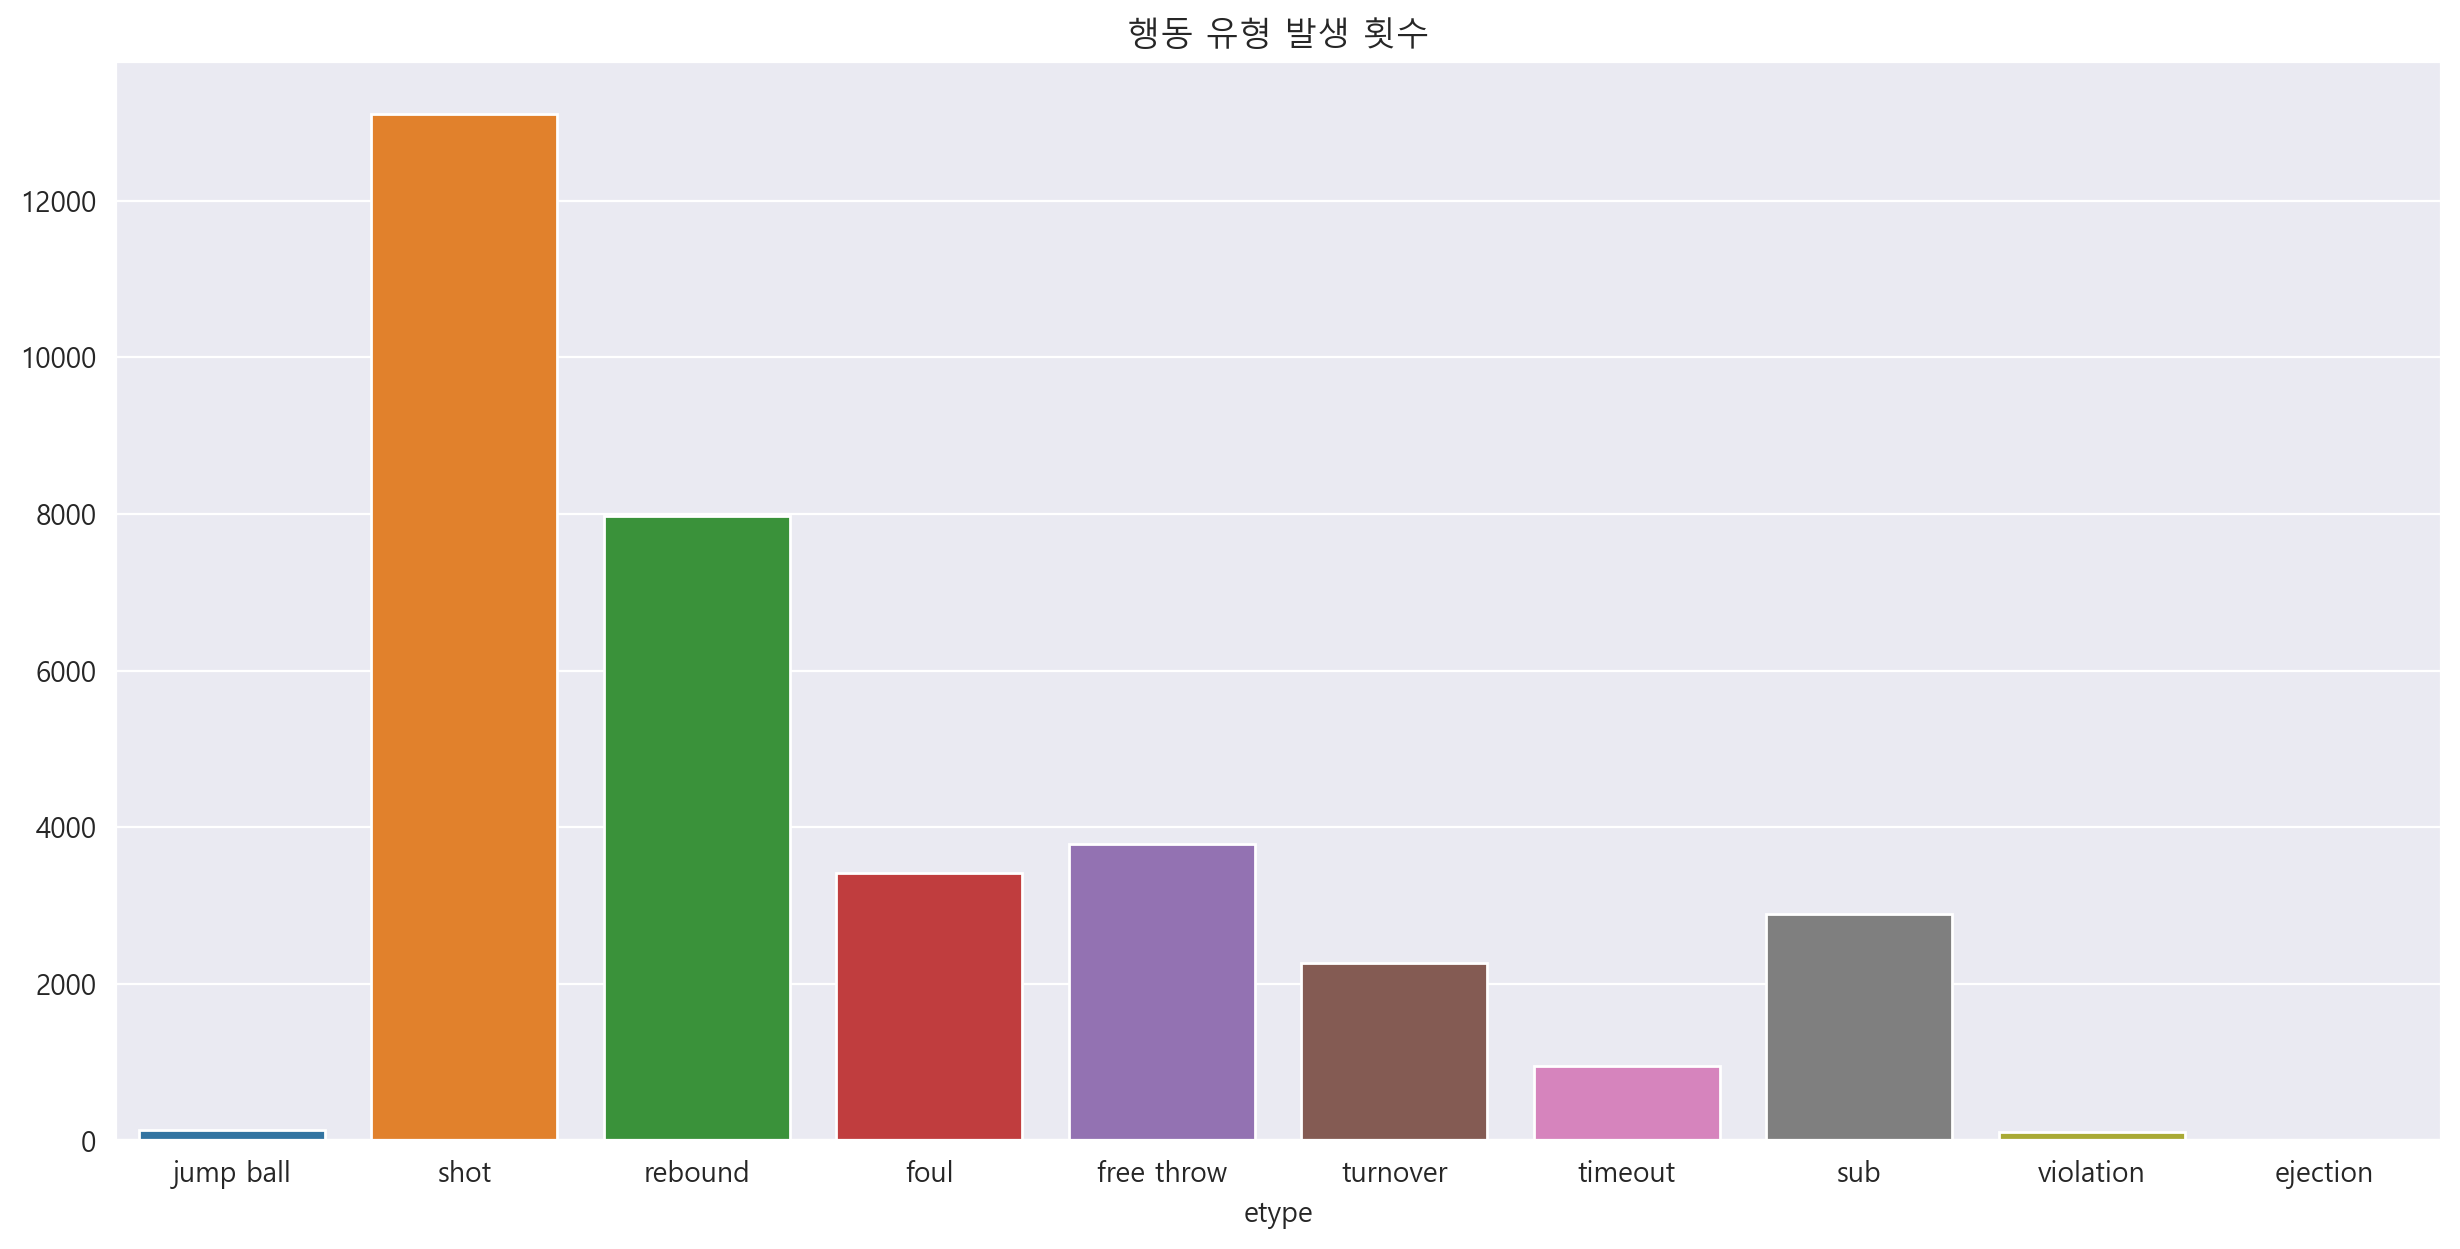

In [29]:
fig, ax=plt.subplots(1, 1, figsize=(15, 7), dpi=200)

_=sns.countplot(x=df_copy["etype"], ax=ax)
_=ax.set_ylabel("")
_=ax.set_title("행동 유형 발생 횟수")

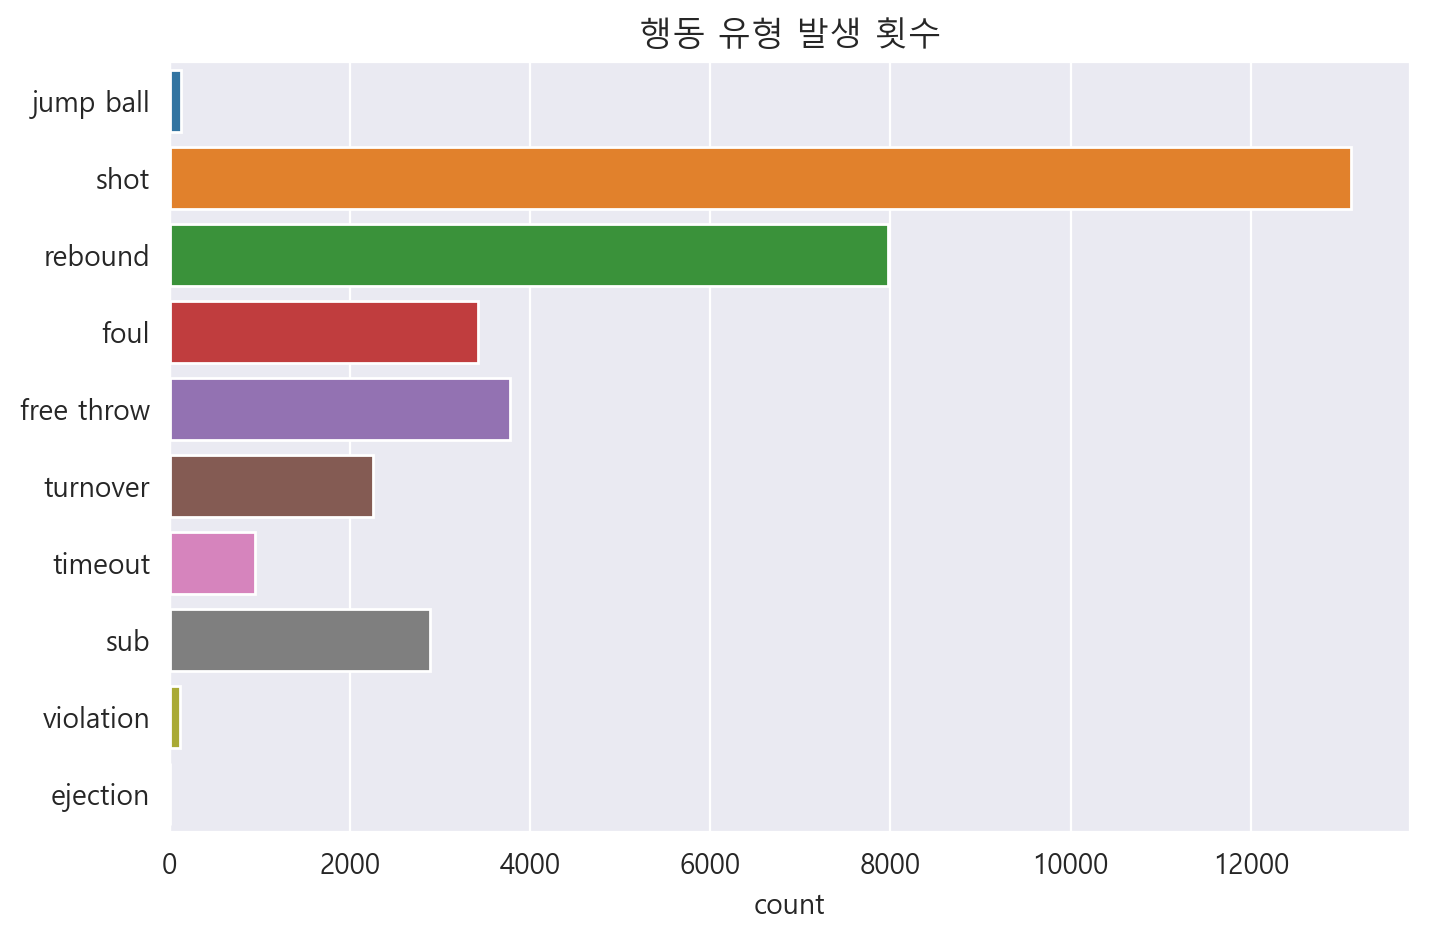

In [30]:
fig, ax=plt.subplots(1, 1, figsize=(8, 5), dpi=200)

_=sns.countplot(y=df_copy["etype"], ax=ax)
_=ax.set_ylabel("")
_=ax.set_title("행동 유형 발생 횟수")

In [31]:
# 각 쿼터에서 가장 자주 등장하는 행동
df3=df_copy[["period", "etype"]].groupby(["period", "etype"]).size().reset_index()
df3.columns=["period", "etype", "count"]

In [32]:
# 이런 경우에 어떻게 해야 할까?
# period 기준으로 count가 max인 행만 골라야 한다. (period는 1 ~ 5)
df3.head(10)

,period,etype,count
0,1,foul,665
1,1,free throw,666
2,1,jump ball,85
3,1,rebound,2023
4,1,shot,3500
5,1,sub,555
6,1,timeout,166
7,1,turnover,547
8,1,violation,25
9,2,foul,887


In [33]:
# pivot
df2=df_copy.groupby(["period", "etype"]).size().reset_index().pivot(columns="period", 
                                                                index="etype", values=0)
df2

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0


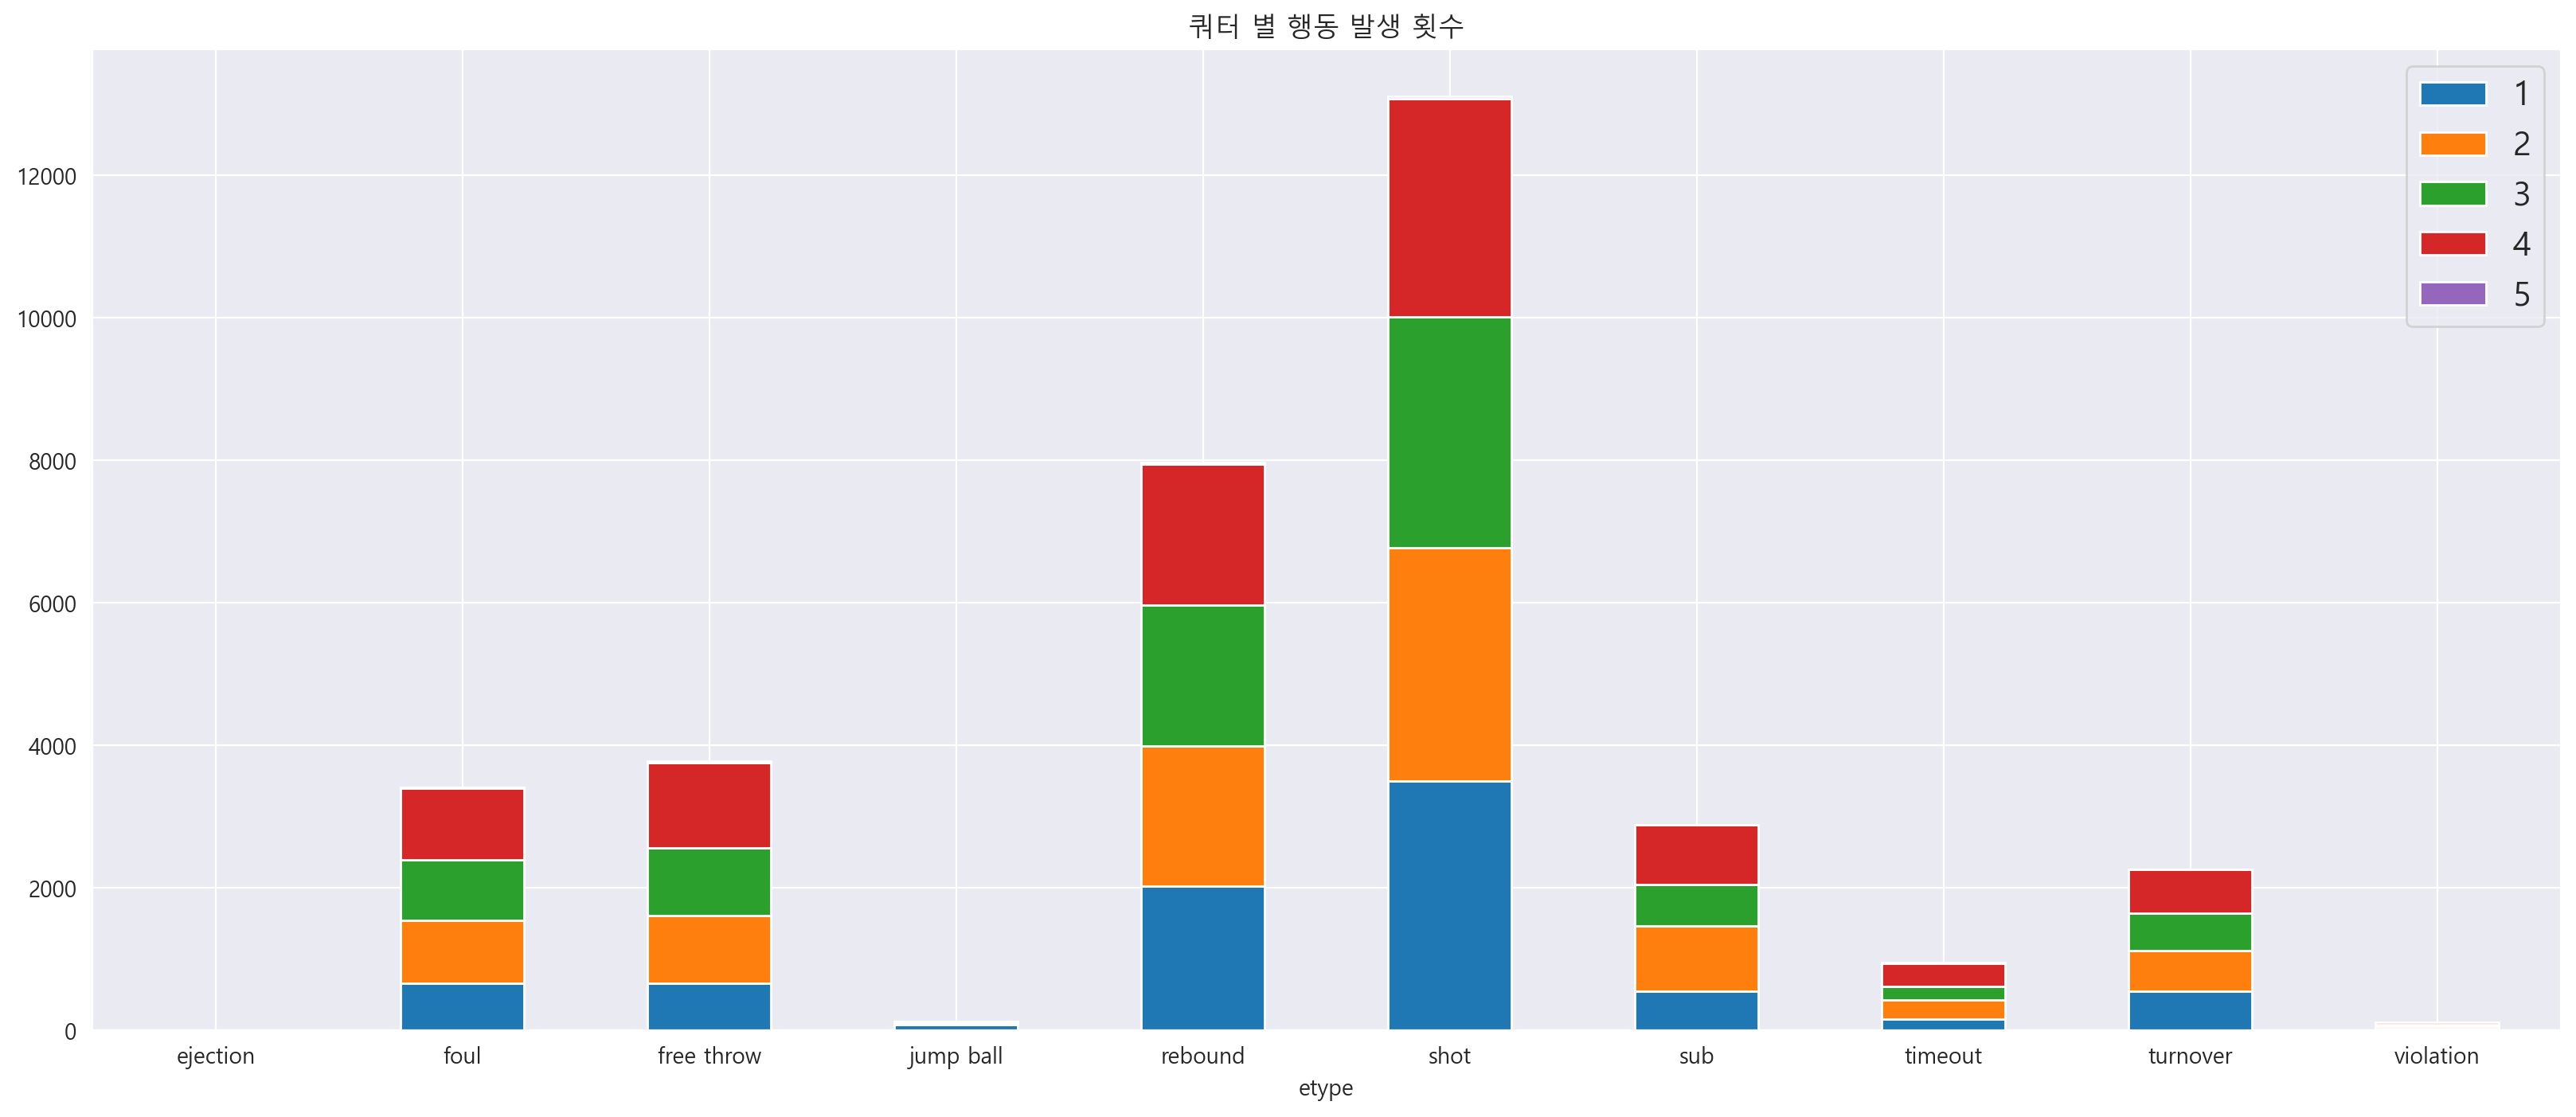

In [34]:
# stack plot 
fig, ax=plt.subplots(1, 1, figsize=(20, 8), dpi=200)
_=df2.plot(kind="bar", stacked=True, ax=ax)
_=ax.legend(fontsize=15)
_=plt.xticks(rotation=0) # 글자 회전
_=ax.set_title("쿼터 별 행동 발생 횟수")

In [35]:
# 1. idxmax
df3.groupby(["period"])["count"].max()

period
1    3500
2    3279
3    3232
4    3063
5      34
Name: count, dtype: int64

In [36]:
df3.loc[df3.groupby(["period"])["count"].idxmax()]

,period,etype,count
4,1,shot,3500
13,2,shot,3279
23,3,shot,3232
32,4,shot,3063
41,5,shot,34


In [37]:
# 2. sort_values, by, drop_duplicates
df3.sort_values(by=["period", "count"]).drop_duplicates("period", keep="last")

,period,etype,count
4,1,shot,3500
13,2,shot,3279
23,3,shot,3232
32,4,shot,3063
41,5,shot,34


## 경기 결과 집계 후 시계열 그래프로 그리기

In [38]:
# 시간 데이터가 있으면 시계열 그래프 그려보는 것이 좋다
# made, 즉 성공했을 때의 득점 더하기
# df_copy.loc[df_copy["result"]=="made", ["date", "result", "points"]].groupby(["date"], as_index=False)["points"].sum()

In [39]:
df_success=df_copy.loc[df_copy["result"].isin(["made"])]
df3=df_success[["date", "team", "points"]].groupby(["date", "team"], as_index=False).sum()

In [40]:
df3

,date,team,points
0,2008-10-28,LAL,96
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
3,2008-10-29,LAL,117
4,2008-11-01,DEN,97
...,...,...,...
151,2009-04-10,POR,106
152,2009-04-12,LAL,92
153,2009-04-12,MEM,75
154,2009-04-14,LAL,125


In [41]:
# LAL 기준으로 경기 결과 확인하기
lal=df3.loc[df3["team"]=="LAL"] # LAL
opp=df3.loc[df3["team"]!="LAL"] # 상대팀

# 하나의 데이터를 LAL팀과 상대팀으로 나누어서 그래프 생성하기

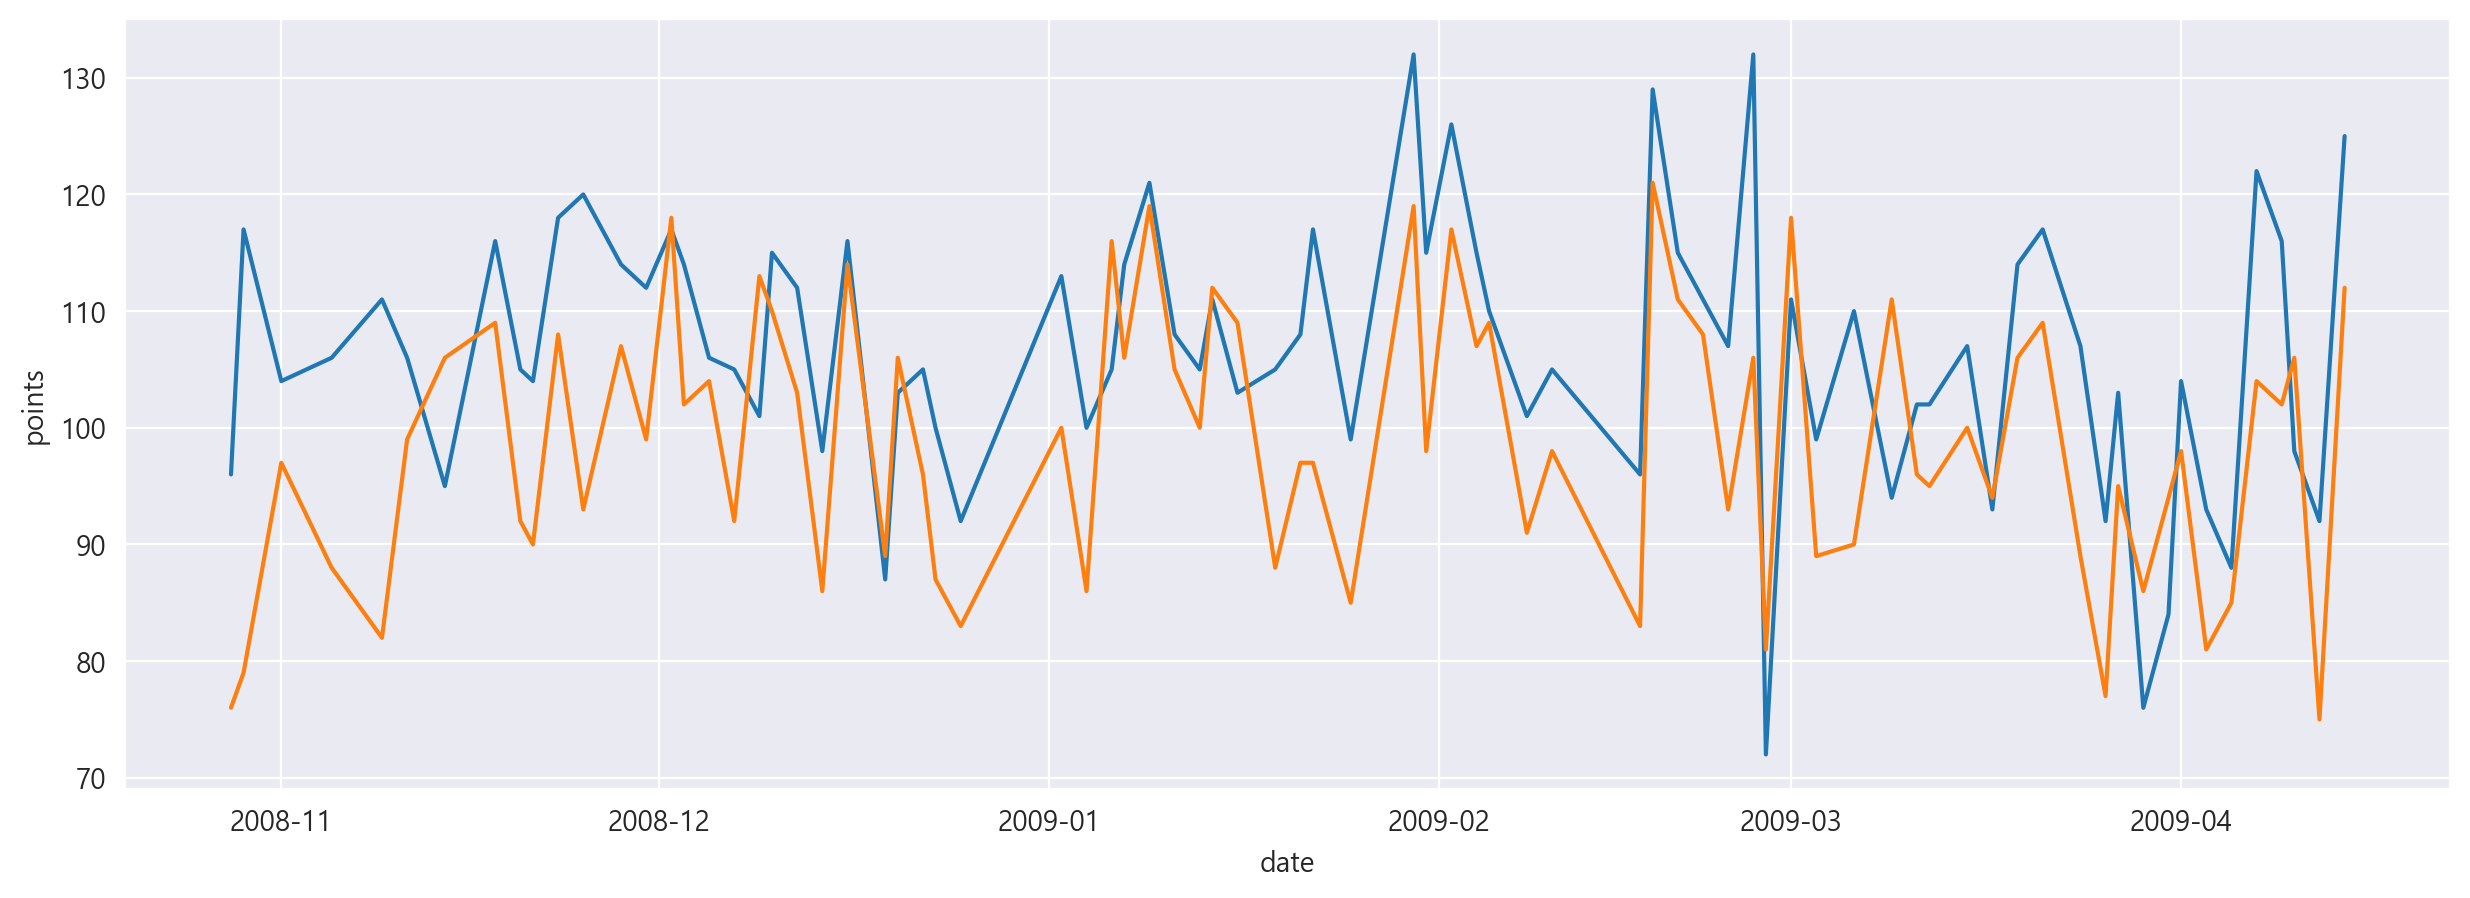

In [42]:
# 따로 그려보자, 가독성이 떨어진다
# 병합한 뒤에 승리한 날과 패배한 날을 나눠서 생각해보자

fig, ax=plt.subplots(1, 1, figsize=(15, 5), dpi=200)

_=sns.lineplot(data=lal, x="date", y="points")
_=sns.lineplot(data=opp, x="date", y="points")

In [43]:
# 병합하여 생각해보자
df4=pd.merge(lal, opp, on="date")
df4

,date,team_x,points_x,team_y,points_y
0,2008-10-28,LAL,96,POR,76
1,2008-10-29,LAL,117,LAC,79
2,2008-11-01,LAL,104,DEN,97
3,2008-11-05,LAL,106,LAC,88
4,2008-11-09,LAL,111,HOU,82
...,...,...,...,...,...
73,2009-04-07,LAL,122,SAC,104
74,2009-04-09,LAL,116,DEN,102
75,2009-04-10,LAL,98,POR,106
76,2009-04-12,LAL,92,MEM,75


In [44]:
# LAL 승리
win=df4[df4["points_x"]>df4["points_y"]]

# LAL 패배
los=df4[df4["points_x"]<df4["points_y"]]

print(f"이번 시즌에서 LAL은 {df4.shape[0]} 경기 중 {win.shape[0]}번 우승하였습니다.")

이번 시즌에서 LAL은 78 경기 중 63번 우승하였습니다.


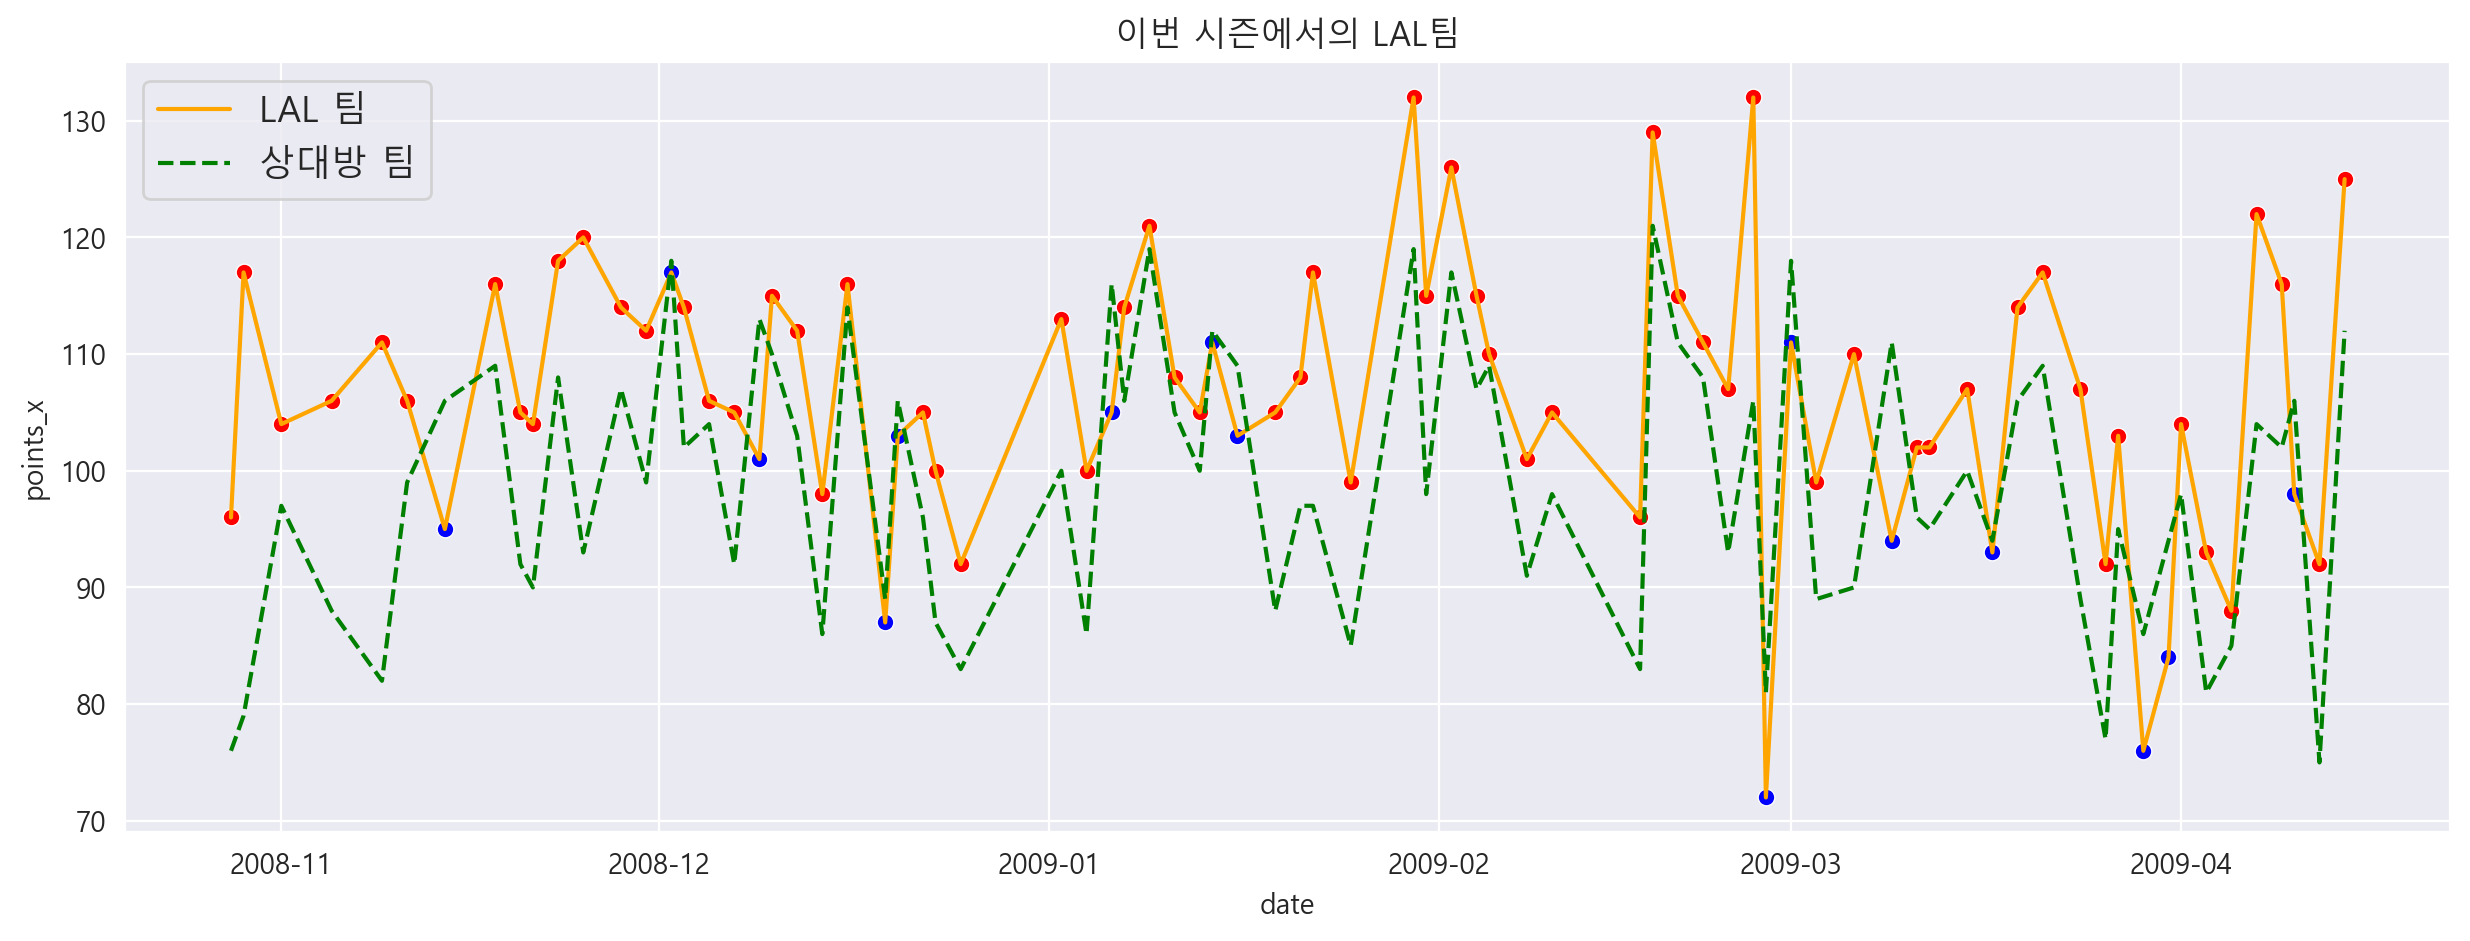

In [52]:
# LAL 팀 날짜 별 점수 (df4)
# 상대방 팀 날짜 별 점수 (df4)
# LAL 팀 이긴 경우 (win)
# LAL 팀 진 경우 (los)

fig, ax=plt.subplots(1, 1, figsize=(15, 5), dpi=200)
_=ax.set_title("이번 시즌에서의 LAL팀")

# LAL 팀의 점수를 오렌지 실선으로 나타낸다
# LAL 팀이 이긴 날은 빨간 점, LAL 팀이 진 날은 파란 점으로 표기하기
# 상대방 팀은 초록색 점선으로 나타낸다

_=sns.lineplot(data=df4, x="date", y="points_x", color="orange", ax=ax, label="LAL 팀")
_=sns.lineplot(data=df4, x="date", y="points_y", color="green", ax=ax, linestyle="--", label="상대방 팀")
_=sns.scatterplot(data=win, x="date", y="points_x", color="red", ax=ax, marker="o")
_=sns.scatterplot(data=los, x="date", y="points_x", color="blue", ax=ax, marker="o")

_=ax.legend(fontsize=13)
# 경기 결과를 한 번에 확인 가능하다

## LAL 팀의 코트 위치 별 행동

In [77]:
# LAL 팀만 가져오기
lal2=df_copy.loc[df_copy["team"]=="LAL"]
lal2.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,-1.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,-1.0,0.0,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00


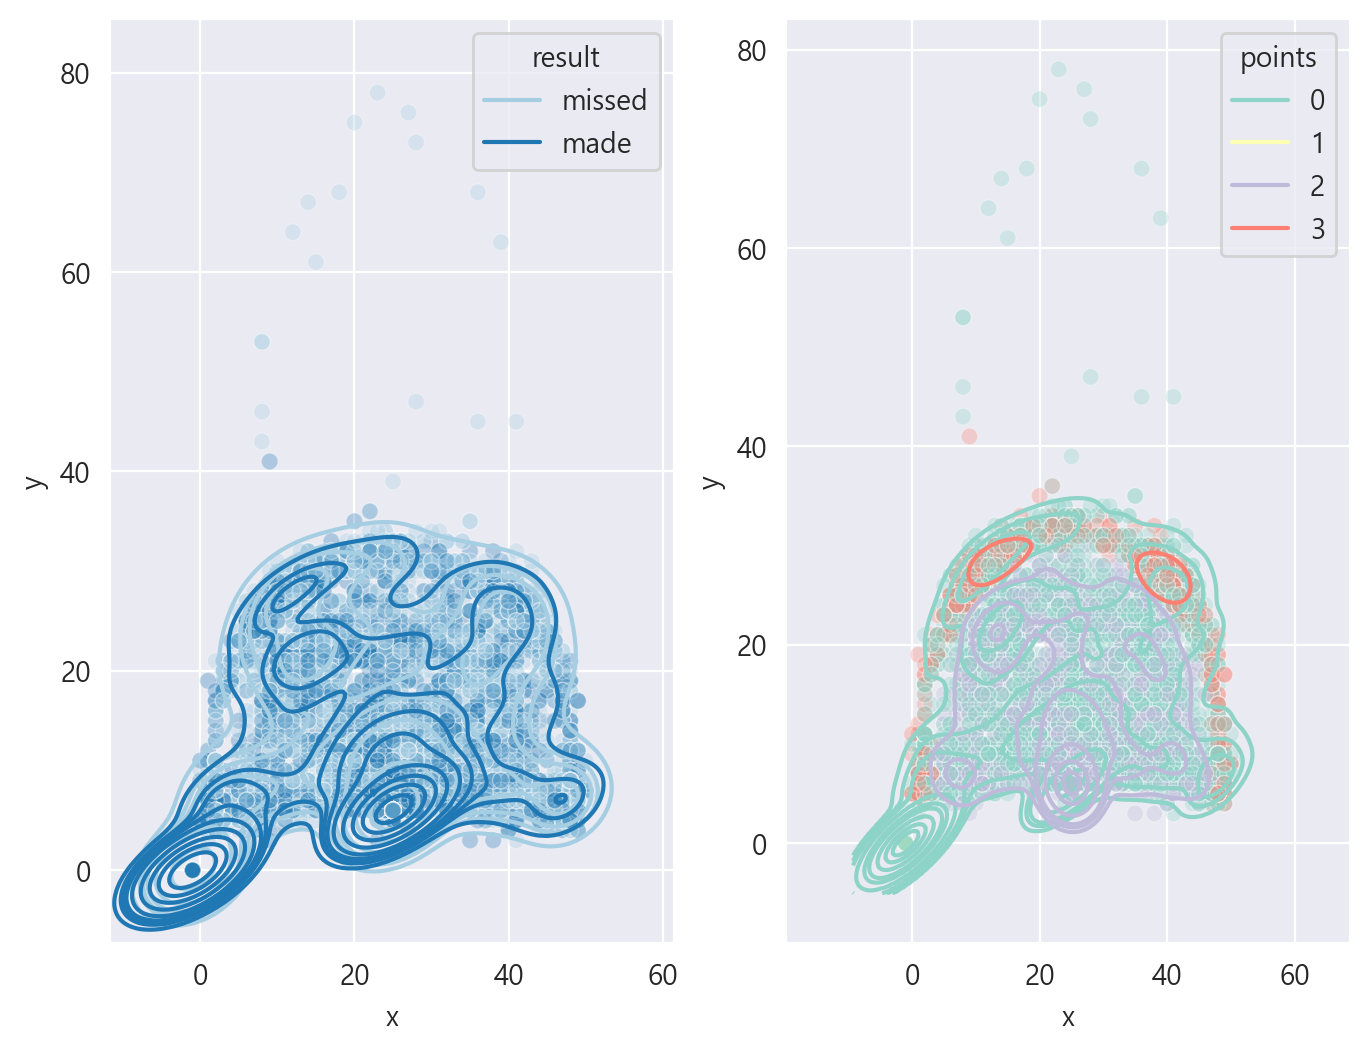

In [146]:
fig, ax=plt.subplots(1, 2, figsize=(8, 6), dpi=200)
ax=ax.flatten()

# 득점 성공 / 실패 분포
_=sns.scatterplot(data=lal2, x="x", y="y", alpha=0.3, ax=ax[0], hue="result",  palette="Paired")
_=sns.kdeplot(data=lal2, x="x", y="y", ax=ax[0], hue="result", palette="Paired")

# 득점 점수 별 분포
_=sns.scatterplot(data=lal2, x="x", y="y", alpha=0.3, ax=ax[1], hue="points", palette="Set3")
_=sns.kdeplot(data=lal2, x="x", y="y", ax=ax[1], hue="points", palette="Set3")

# 왼쪽에서 성공이 좀 더 잦은 것 같으니, 다음 경기에서는 왼쪽을 보완하기

In [118]:
# 상위 10위까지 가장 많은 세부 행동들
lal2["type"].value_counts().head(10).index

Index(['def', 'jump', '3pt', 'layup', 'off', 'shooting', 'personal', 'regular',
       'driving layup', 'hook'],
      dtype='object')

In [122]:
lal3=lal2[lal2["type"].isin(lal2["type"].value_counts().head(10).index)]
lal3.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,-1.0,0.0,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,-1.0,0.0,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00


In [123]:
# 상위 10개와 동일하게 등장한다
lal3["type"].unique()

array(['hook', 'off', 'layup', 'personal', 'def', 'jump', 'driving layup',
       '3pt', 'regular', 'shooting'], dtype=object)

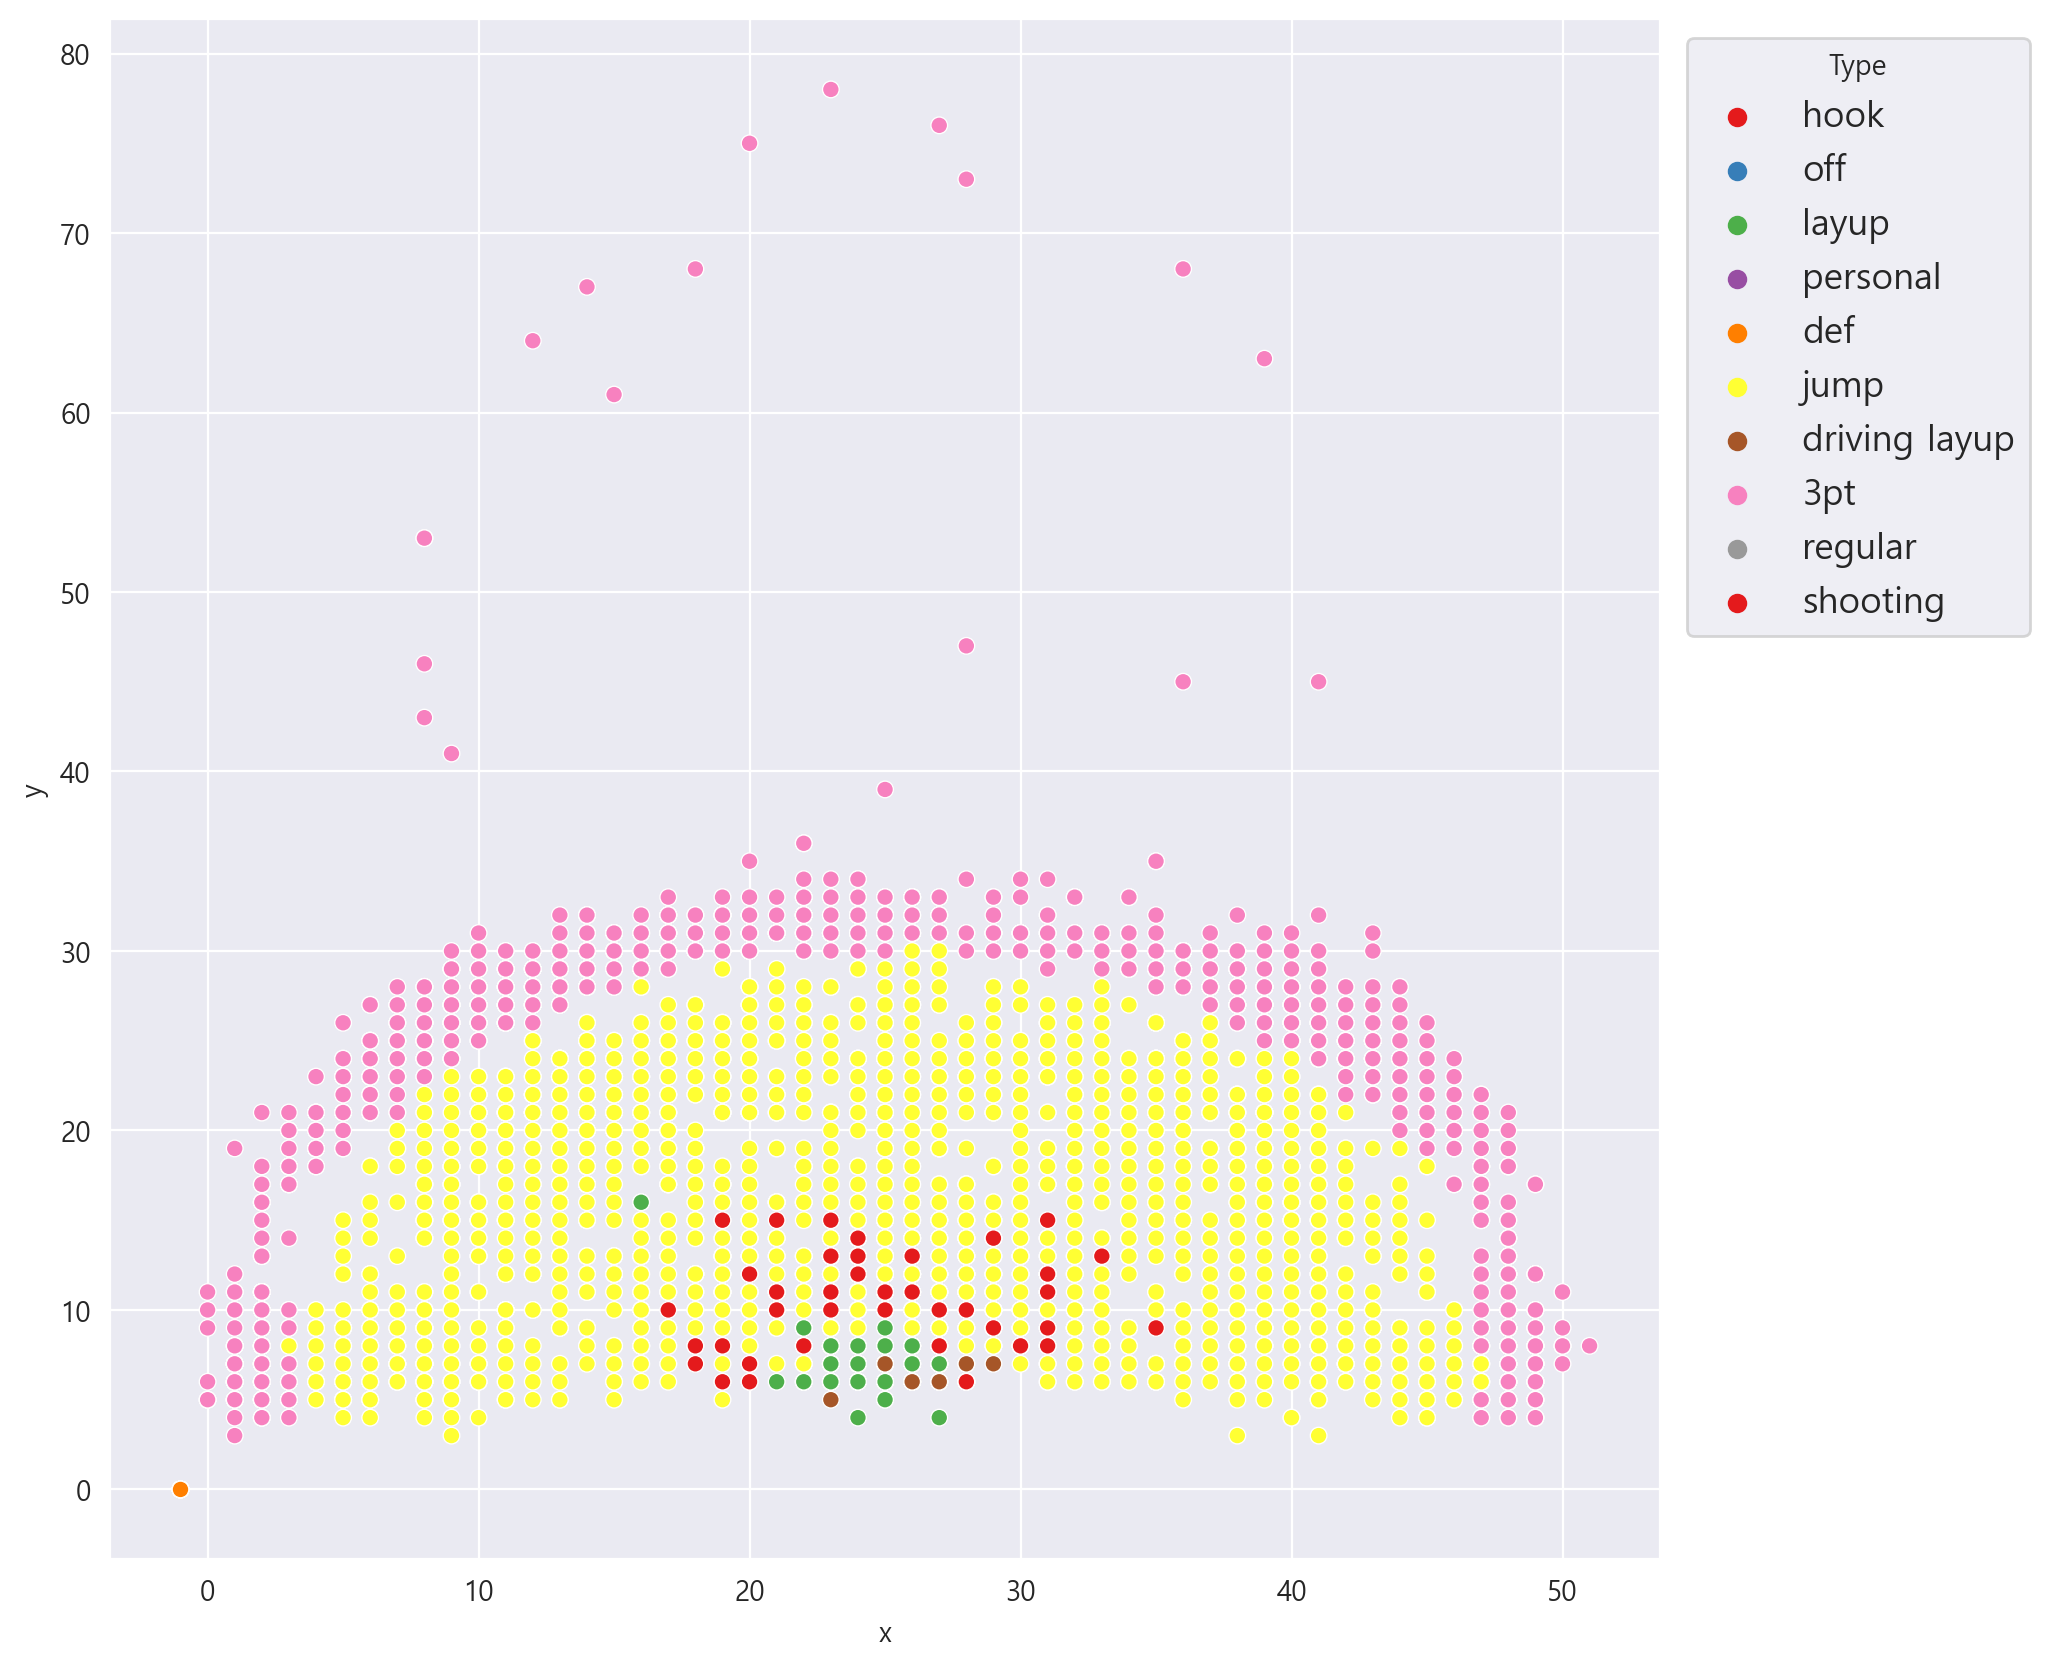

In [145]:
# 세부 행동 별 위치 확인하기
fig, ax=plt.subplots(1, 1, figsize=(10, 10), dpi=200)

_=sns.scatterplot(data=lal3, x="x", y="y", hue="type", ax=ax, palette="Set1")
_=ax.legend(title="Type", bbox_to_anchor=(1.25, 1), fontsize=13)

In [147]:
# 특정 선수의 행동 패턴 분석
# A팀 vs B팀, 어떤 세부 행동이 많은지, 어떤 전략을 가지고 있는지 더 알아보기